In [22]:
import pandas as pd

from rotalysis import UtilityFunction as uf, PumpFunction as pf
import matplotlib.pyplot as plt


In [2]:
path = r"T:\Project\aeT00989.00 Decarbonization Feasibility Study\03. Client design information\ReferenceDocs\05. Umm Lulu_UL\576-CM-2069_Vapor Recovery Compressor\12. Operational Data\576-CM-2069\History Data\576CM2069_HisData.csv"
df=  pd.read_csv(path,header=1)

C:\Users\IDM252577\AppData\Local\Temp\ipykernel_11512\780990313.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df=  pd.read_csv(path,header=1)


In [3]:
df = uf.Clean_dataframe(df)


<Axes: >

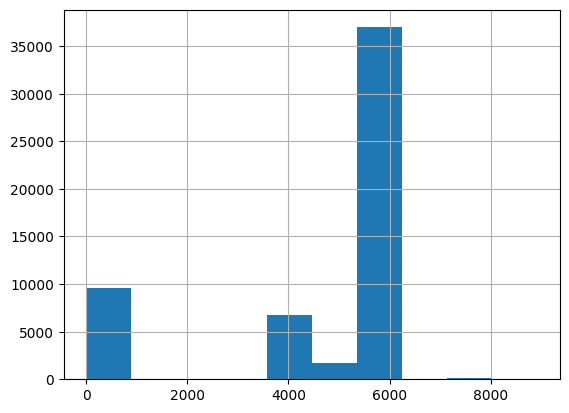

In [4]:
df.loc[df["576-FI-2601.PV"]>0,"576-FI-2601.PV"].hist()


<Axes: >

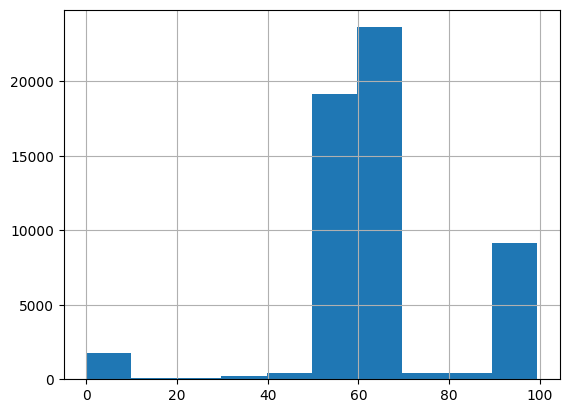

In [6]:
#1st stg ASV
df.loc[df["576-FI-2601.PV"]>0,"576-ZI-2600.PV"].hist()

<Axes: >

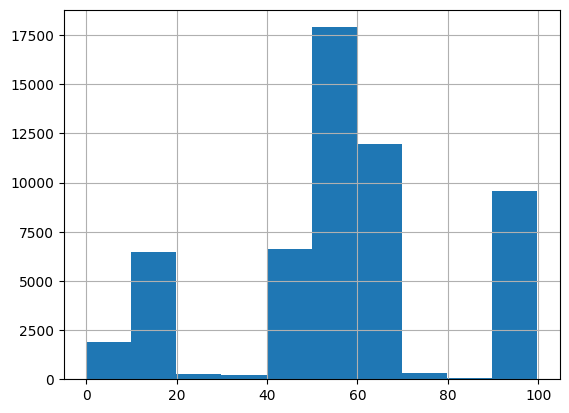

In [7]:
#2nd stg ASV
df.loc[df["576-FI-2601.PV"]>0,"576-ZI-2601.PV"].hist()

<Axes: >

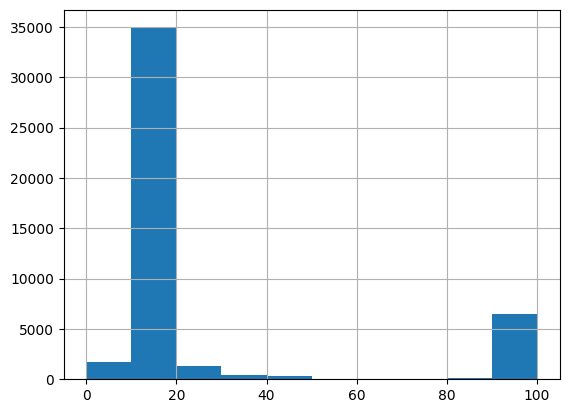

In [21]:
#4th stg ASV
df.loc[(df["576-FI-2601.PV"]>10) & (df["576-KI-2710.PV"]>0),"576-ZI-2602.PV"].hist()

<Axes: >

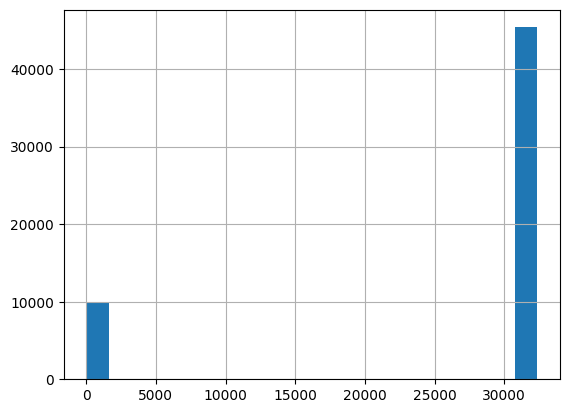

In [16]:
# 1st stg speed
df.loc[df["576-FI-2601.PV"]>0,"576-KI-2711.PV"].hist(bins=20)

In [11]:
df.loc[df["576-FI-2601.PV"]>0,"576-KI-2711.PV"].mean()

26392.200234924363

In [12]:
df.loc[df["576-FI-2601.PV"]>0,"576-KI-2710.PV"].mean()

24687.877940262413

In [25]:
CF = pf.get_speed_variation(45,34)
print (CF * 100)

91.07981386981562


In [55]:
polytropic_eff = 0.7807
k = 1.24516315609558
adiabatic_exponent = (k-1) / k
polytropic_exponent = adiabatic_exponent / polytropic_eff

In [60]:
polytropic_exponent

0.2521998143990291

In [79]:
Zs = 0.977111204484300
Zd = 0.9807
Z_avg = (Zs + Zd) / 2
Z = (Z_avg**(1/k)) * (Zs**adiabatic_exponent) 
R = 8.314 #J/mol.K
Ps = 741.736686392573 #kPa
Pd = 3360.00000000000 #kPa
Ts = (22.90 + 273.15) #K
Qm = 97112.7278260361
MW = 22.16

In [81]:
polytropic_head = ((Z * (R / MW)* Ts ) / polytropic_exponent) * (((Pd/Ps)**(polytropic_exponent)) - 1)
polytropic_head #kJ/kg

199.85934467016202

In [82]:
power = (polytropic_head * Qm) / 3600
power

5391.357261789829

In [83]:
power / polytropic_eff

6905.798977571191